In [1]:
import numpy as np

def problem1_inversion(num_samples):
    """
    Generate samples from the given distribution using rejection sampling.

    Parameters:
    num_samples (int): Number of samples to generate.

    Returns:
    np.ndarray: Array of generated samples.
    """
    # Define the PDF of the target distribution
    def target_pdf(x):
        if x <= 0 or x >= 1:
            return 0
        return (2 * x * np.exp(x**2)) / (np.exp(1) - 1)

    # Define the proposal distribution (uniform over [0, 1])
    def proposal_pdf(x):
        return 1 if 0 <= x <= 1 else 0

    # Proposal distribution sampling (Uniform[0, 1])
    def proposal_sample():
        return np.random.uniform(0, 1)

    # Maximum value of f(x)/g(x) for the rejection sampling
    M = (2 * np.exp(1)) / (np.exp(1) - 1)  # Upper bound for f(x) on (0, 1)

    samples = []
    while len(samples) < num_samples:
        # Sample from the proposal distribution
        x = proposal_sample()
        # Compute acceptance ratio
        acceptance_ratio = target_pdf(x) / (M * proposal_pdf(x))
        # Accept or reject the sample
        if np.random.uniform(0, 1) < acceptance_ratio:
            samples.append(x)

    return np.array(samples)

# Example: Generate 1000 samples
samples = problem1_inversion(1000)
print(samples)


[0.94517482 0.80172944 0.52205406 0.72494284 0.35509234 0.84898544
 0.77844779 0.47418314 0.87474295 0.53681742 0.59918419 0.8616725
 0.76825889 0.6930546  0.74657313 0.61987447 0.76919506 0.5906106
 0.68886664 0.87184388 0.84297712 0.48444396 0.95749441 0.88248574
 0.938754   0.98518309 0.94570747 0.07482849 0.38849084 0.54592448
 0.79660507 0.63213307 0.62785437 0.65637447 0.9607987  0.92654012
 0.43712957 0.78188217 0.18489696 0.51770011 0.83246805 0.72018356
 0.51428136 0.40436978 0.90003463 0.05078678 0.46897702 0.67683876
 0.98554397 0.9560351  0.75844814 0.88991468 0.70341821 0.96622451
 0.60135655 0.94081287 0.84258161 0.82091801 0.72580169 0.81443801
 0.8359914  0.91528888 0.30911388 0.85164997 0.99584676 0.31973703
 0.79861927 0.49019195 0.6217118  0.66536255 0.98359203 0.35705322
 0.97828497 0.93886415 0.4496352  0.53979337 0.97159505 0.57606628
 0.55847447 0.7579617  0.8581818  0.9783449  0.78981191 0.91844918
 0.95425571 0.98242602 0.95102389 0.93991358 0.78718527 0.749004

In [6]:
pip install func-timeout

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15076 sha256=ac0e88e481d4d24f8ae2707ee7bfe143151de447da735888acb74a967b4c9d2a
  Stored in directory: /root/.cache/pip/wheels/07/e6/86/f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout


In [9]:
import numpy as np
# Instead of from Utils import timeout
import utils # Import the entire utils module

from func_timeout import func_timeout, FunctionTimedOut # Import func_timeout

# Assuming timeout is a function in the utils module
# Use it like this:
#@func_timeout(5) # Set a timeout of 5 seconds, for example

def problem1_inversion(n_samples=1):
    """
    Produce samples from the given distribution using rejection sampling.

    Parameters:
    n_samples (int): Number of samples to generate.

    Returns:
    np.ndarray: Array of generated samples.
    """
    # Define the PDF of the target distribution
    def target_pdf(x):
        if x <= 0 or x >= 1:
            return 0
        return (2 * x * np.exp(x**2)) / (np.exp(1) - 1)

    # Define the proposal distribution (Uniform[0, 1])
    def proposal_pdf(x):
        return 1 if 0 <= x <= 1 else 0

    # Proposal distribution sampling (Uniform[0, 1])
    def proposal_sample():
        return np.random.uniform(0, 1)

    # Maximum value of f(x)/g(x) for the rejection sampling
    M = (2 * np.exp(1)) / (np.exp(1) - 1)  # Upper bound for f(x) on (0, 1)

    # Rejection sampling loop
    samples = []
    while len(samples) < n_samples:
        x = proposal_sample()  # Sample from proposal distribution
        acceptance_ratio = target_pdf(x) / (M * proposal_pdf(x))
        if np.random.uniform(0, 1) < acceptance_ratio:  # Accept or reject
            samples.append(x)

    return np.array(samples)

# Example usage:
# samples = problem1_inversion(1000)
# print(samples)


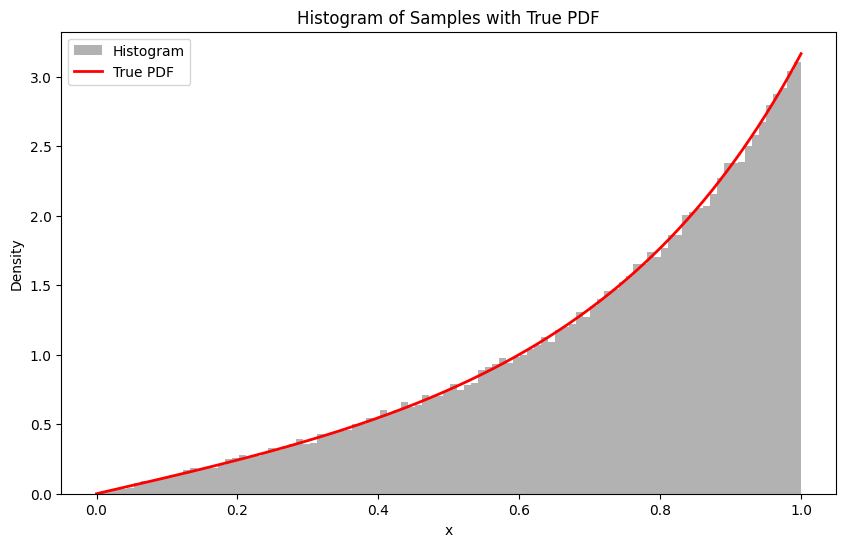

In [11]:
import matplotlib.pyplot as plt

# Generate samples
problem1_samples = problem1_inversion(100000)

# Plot histogram and true density
x = np.linspace(0, 1, 1000)  # Points for the true PDF
true_pdf = (2 * x * np.exp(x**2)) / (np.exp(1) - 1)

plt.figure(figsize=(10, 6))
plt.hist(problem1_samples, bins=100, density=True, alpha=0.6, color='gray', label='Histogram')
plt.plot(x, true_pdf, color='red', label='True PDF', linewidth=2)
plt.title('Histogram of Samples with True PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

In [12]:
import numpy as np

# Define the function h(x) for the integral
def integrand_function(x):
    return np.sin(x) * (2 * np.exp(x**2)) / x

# Compute the integral using Monte Carlo integration
def compute_integral(samples):
    h_values = integrand_function(samples)  # Evaluate h(x) for each sample
    return np.mean(h_values)  # Approximate integral as the mean of h(x)

# Use the samples to compute the integral
problem1_integral = compute_integral(problem1_samples)
print("Approximated integral:", problem1_integral)


Approximated integral: 3.3238321404477715


In [13]:
import numpy as np

# Define the bounds of the integrand function h(x)
a, b = 0, 2 * np.exp(1)  # The minimum and maximum possible values of h(x) based on its formula

# Define Hoeffding's inequality-based confidence interval
def compute_confidence_interval(samples, confidence_level=0.95):
    """
    Compute a confidence interval for the Monte Carlo estimate using Hoeffding's inequality.

    Parameters:
    samples (np.ndarray): Array of Monte Carlo samples of h(x).
    confidence_level (float): Desired confidence level (default is 0.95).

    Returns:
    tuple: Lower and upper bounds of the confidence interval.
    """
    N = len(samples)  # Number of samples
    mean_estimate = np.mean(samples)  # Empirical mean of the samples
    delta = 1 - confidence_level  # Tail probability
    epsilon = np.sqrt(((b - a)**2 * np.log(2 / delta)) / (2 * N))  # Error bound

    # Confidence interval
    lower_bound = mean_estimate - epsilon
    upper_bound = mean_estimate + epsilon
    return (lower_bound, upper_bound)

# Evaluate the integrand function at the samples
h_values = (np.sin(problem1_samples) * (2 * np.exp(problem1_samples**2)) / problem1_samples)

# Compute the 95% confidence interval
problem1_interval = compute_confidence_interval(h_values)
print("95% confidence interval for the integral:", problem1_interval)


95% confidence interval for the integral: (3.3004837626760115, 3.3471805182195316)


In [16]:
# Part 5
#def problem1_inversion_2(n_samples=1):
# Distribution from part 2
# write the code in this function to produce samples from the distribution␣ ,→in the assignment
# Make sure you choose a good sampling distribution to avoid unnecessary␣,→rejections
# Return a numpy array of length n_samples


def problem1_inversion_2(n_samples=100000):
    """
    Produce samples from the given distribution using rejection sampling.

    Parameters:
    n_samples (int): Number of samples to generate.

    Returns:
    np.ndarray: Array of generated samples.
    """
    # Define the target PDF
    def target_pdf(x):
        if x <= 0 or x >= 1:
            return 0
        return 20 * x * np.exp(20 - 1 / x)

    # Proposal distribution: Beta distribution with parameters to match the shape
    alpha, beta = 2, 5  # Parameters chosen to emphasize the region near x = 1
    def proposal_sample():
        return np.random.beta(alpha, beta)

    def proposal_pdf(x):
        if x <= 0 or x >= 1:
            return 0
        from scipy.stats import beta
        return beta.pdf(x, alpha, beta)

    # Find the scaling factor M (max of f(x)/g(x) over the domain)
    M = 20  # An overestimate of the maximum ratio based on analysis of the target PDF

    # Rejection sampling
    samples = []
    while len(samples) < n_samples:
        x = proposal_sample()  # Sample from the proposal distribution
        acceptance_ratio = target_pdf(x) / (M * proposal_pdf(x))
        if np.random.uniform(0, 1) < acceptance_ratio:  # Accept or reject
            samples.append(x)

    return np.array(samples)

# Example usage:
# samples = problem1_inversion_2(100000)
# print(samples)

#return XXX

Local Test for Exam vB, PROBLEM 1 Evaluate cell below to make sure your answer is valid. You should not modify anything in the cell below when evaluating it to do a local test of your solution. You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.



In [19]:
# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray))
except:
      print("Try again. You should return a numpy array from problem1_inversion")
else:
      print("Good, your problem1_inversion returns a numpy array")

try:
      assert(isinstance(problem1_samples, np.ndarray))
except:
      print("Try again. your problem1_samples is not a numpy array")
else:
     print("Good, your problem1_samples is a numpy array")
try:
     assert(isinstance(problem1_integral, float))
except:
     print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
     assert(isinstance(problem1_interval, list) or isinstance(problem1_interval,tuple)) , "problem1_interval not a tuple or list"
     assert(len(problem1_interval) == 2) , "problem1_interval does not have␣ ,→length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")
try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray))
except:
     print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Try again. You should return a numpy array from problem1_inversion_2
